In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scienceplots
import os
import seaborn as sns

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [2]:
from src.simulator.simulator import create_simulator
from src.simulator.prior import get_prior
from sbi.utils.user_input_checks import process_prior, process_simulator

simulator = create_simulator()
prior = get_prior()

prior, _, prior_returns_numpy = process_prior(prior)
simulator_wrapper = process_simulator(simulator, prior, prior_returns_numpy)

c:\Users\Julian\anaconda3\envs\sbi_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
simulations = torch.load(os.path.join("..","data","simulations","simulations_5000.pt"), weights_only=True)
theta = simulations["theta"]
x = simulations["x"]

print(theta.shape)
print(x.shape)

torch.Size([5000, 5])
torch.Size([5000, 2551])


In [4]:
from sbi.inference import NPSE 

inference = NPSE(prior=prior)
inference.append_simulations(theta, x)
density_estimator = inference.train(max_num_epochs=0)
density_estimator.load_state_dict(torch.load(os.path.join("..", "results", "inference", "NPSE_5000.pth")))

 Training neural network. Epochs trained: 1

C:\Users\Julian\AppData\Local\Temp\ipykernel_13828\3858237327.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  density_estimator.load_state_dict(torch.load(os.path.join("

<All keys matched successfully>

In [5]:
true_parameter = torch.tensor([0.02212, 0.1206, 1.04077, 3.04, 0.9626])
x_observed = simulator(true_parameter)

posterior = inference.build_posterior(density_estimator).set_default_x(x_observed)
samples = posterior.sample((24000,))


Drawing 6075 posterior samples: 100%|██████████| 499/499 [00:08<00:00, 56.41it/s]2it/s]
Drawing 24000 posterior samples: 26017it [00:38, 680.14it/s]                           


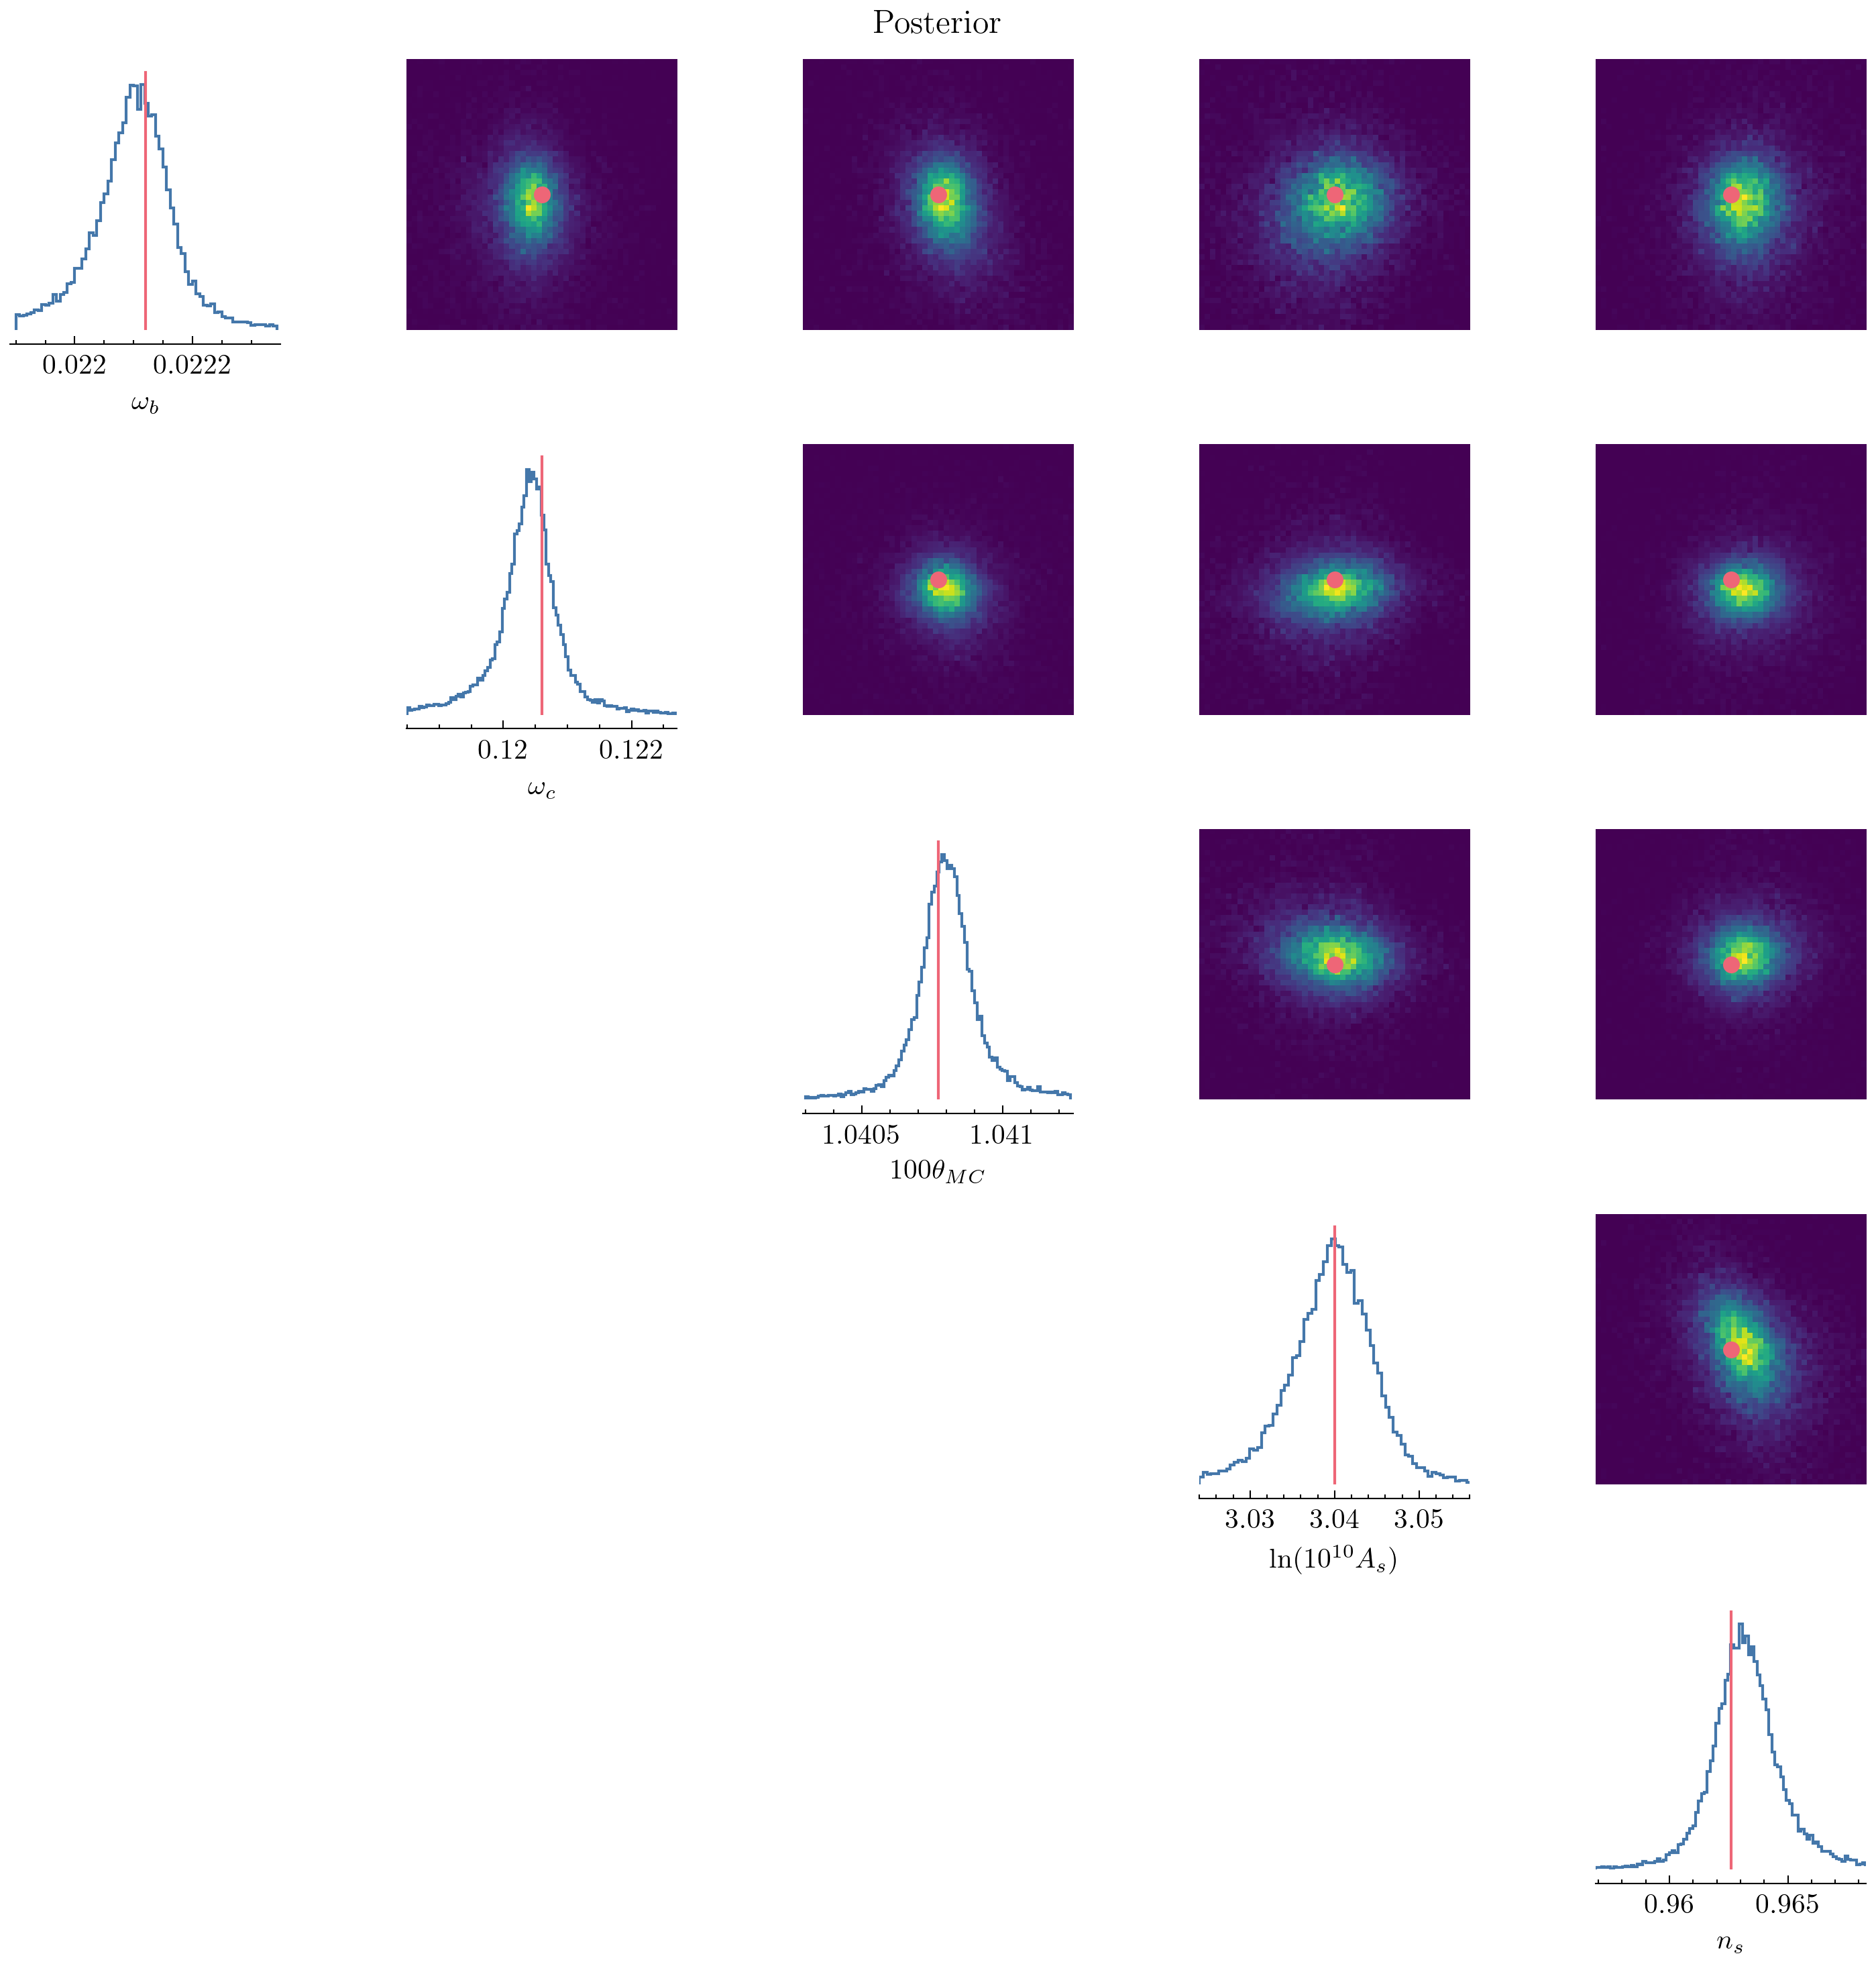

In [6]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.02212-0.00022, 0.02212+0.00022],    
    [0.1206-0.0021, 0.1206+0.0021],  
    [1.04077-0.00047, 1.04077+0.00047],      
    [3.04-0.016, 3.04+0.016],    
    [0.9626-0.0057, 0.9626+0.0057],  
])

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()

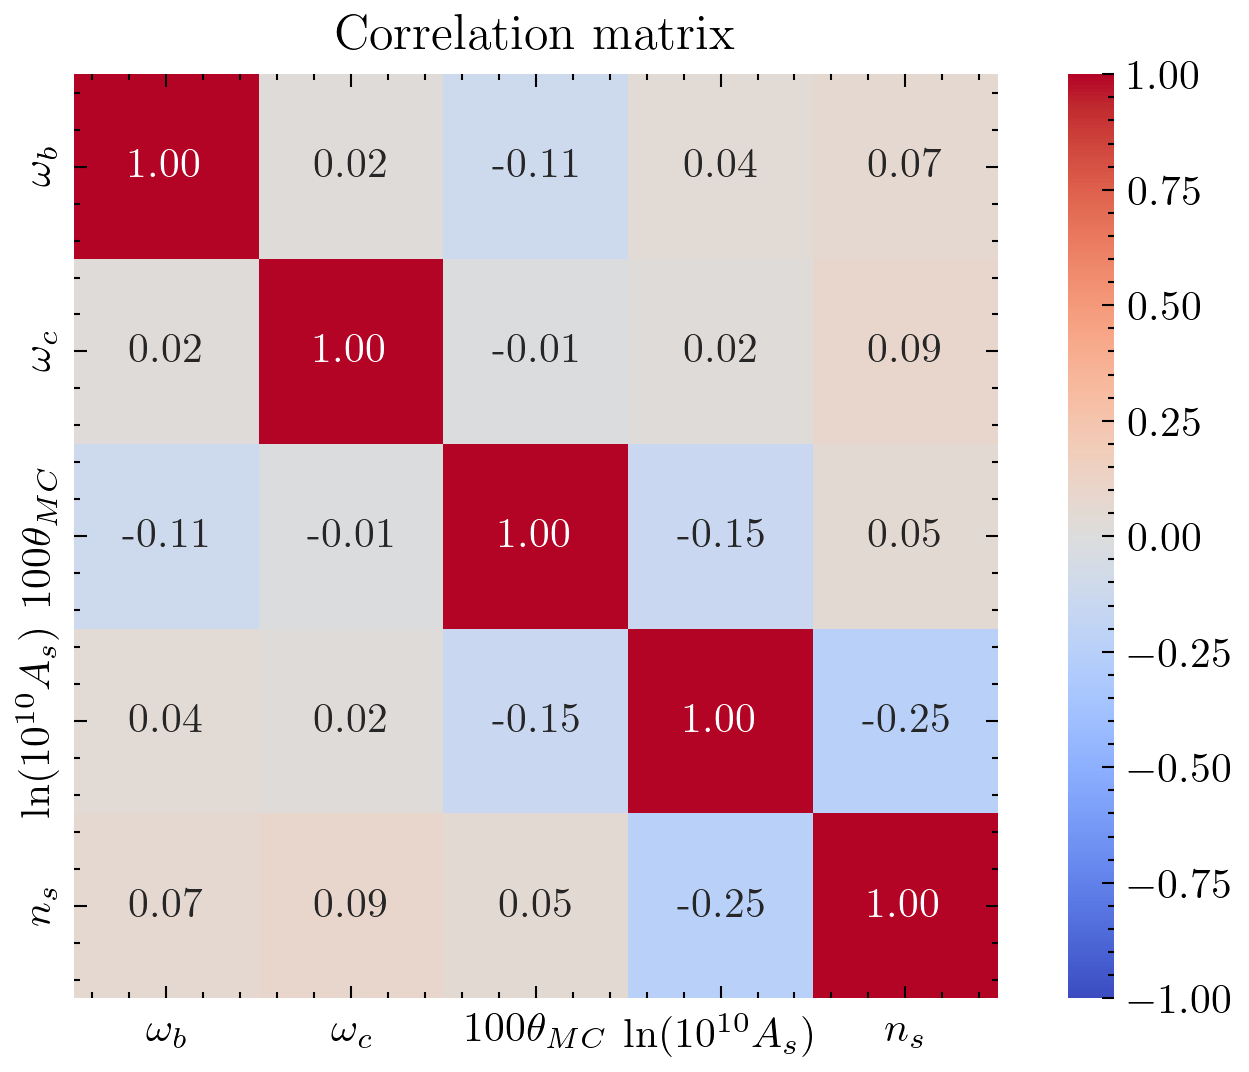

In [7]:
samples_np = samples.numpy()  
correlation_matrix = np.corrcoef(samples_np.T)  

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, xticklabels=param_names, yticklabels=param_names, vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

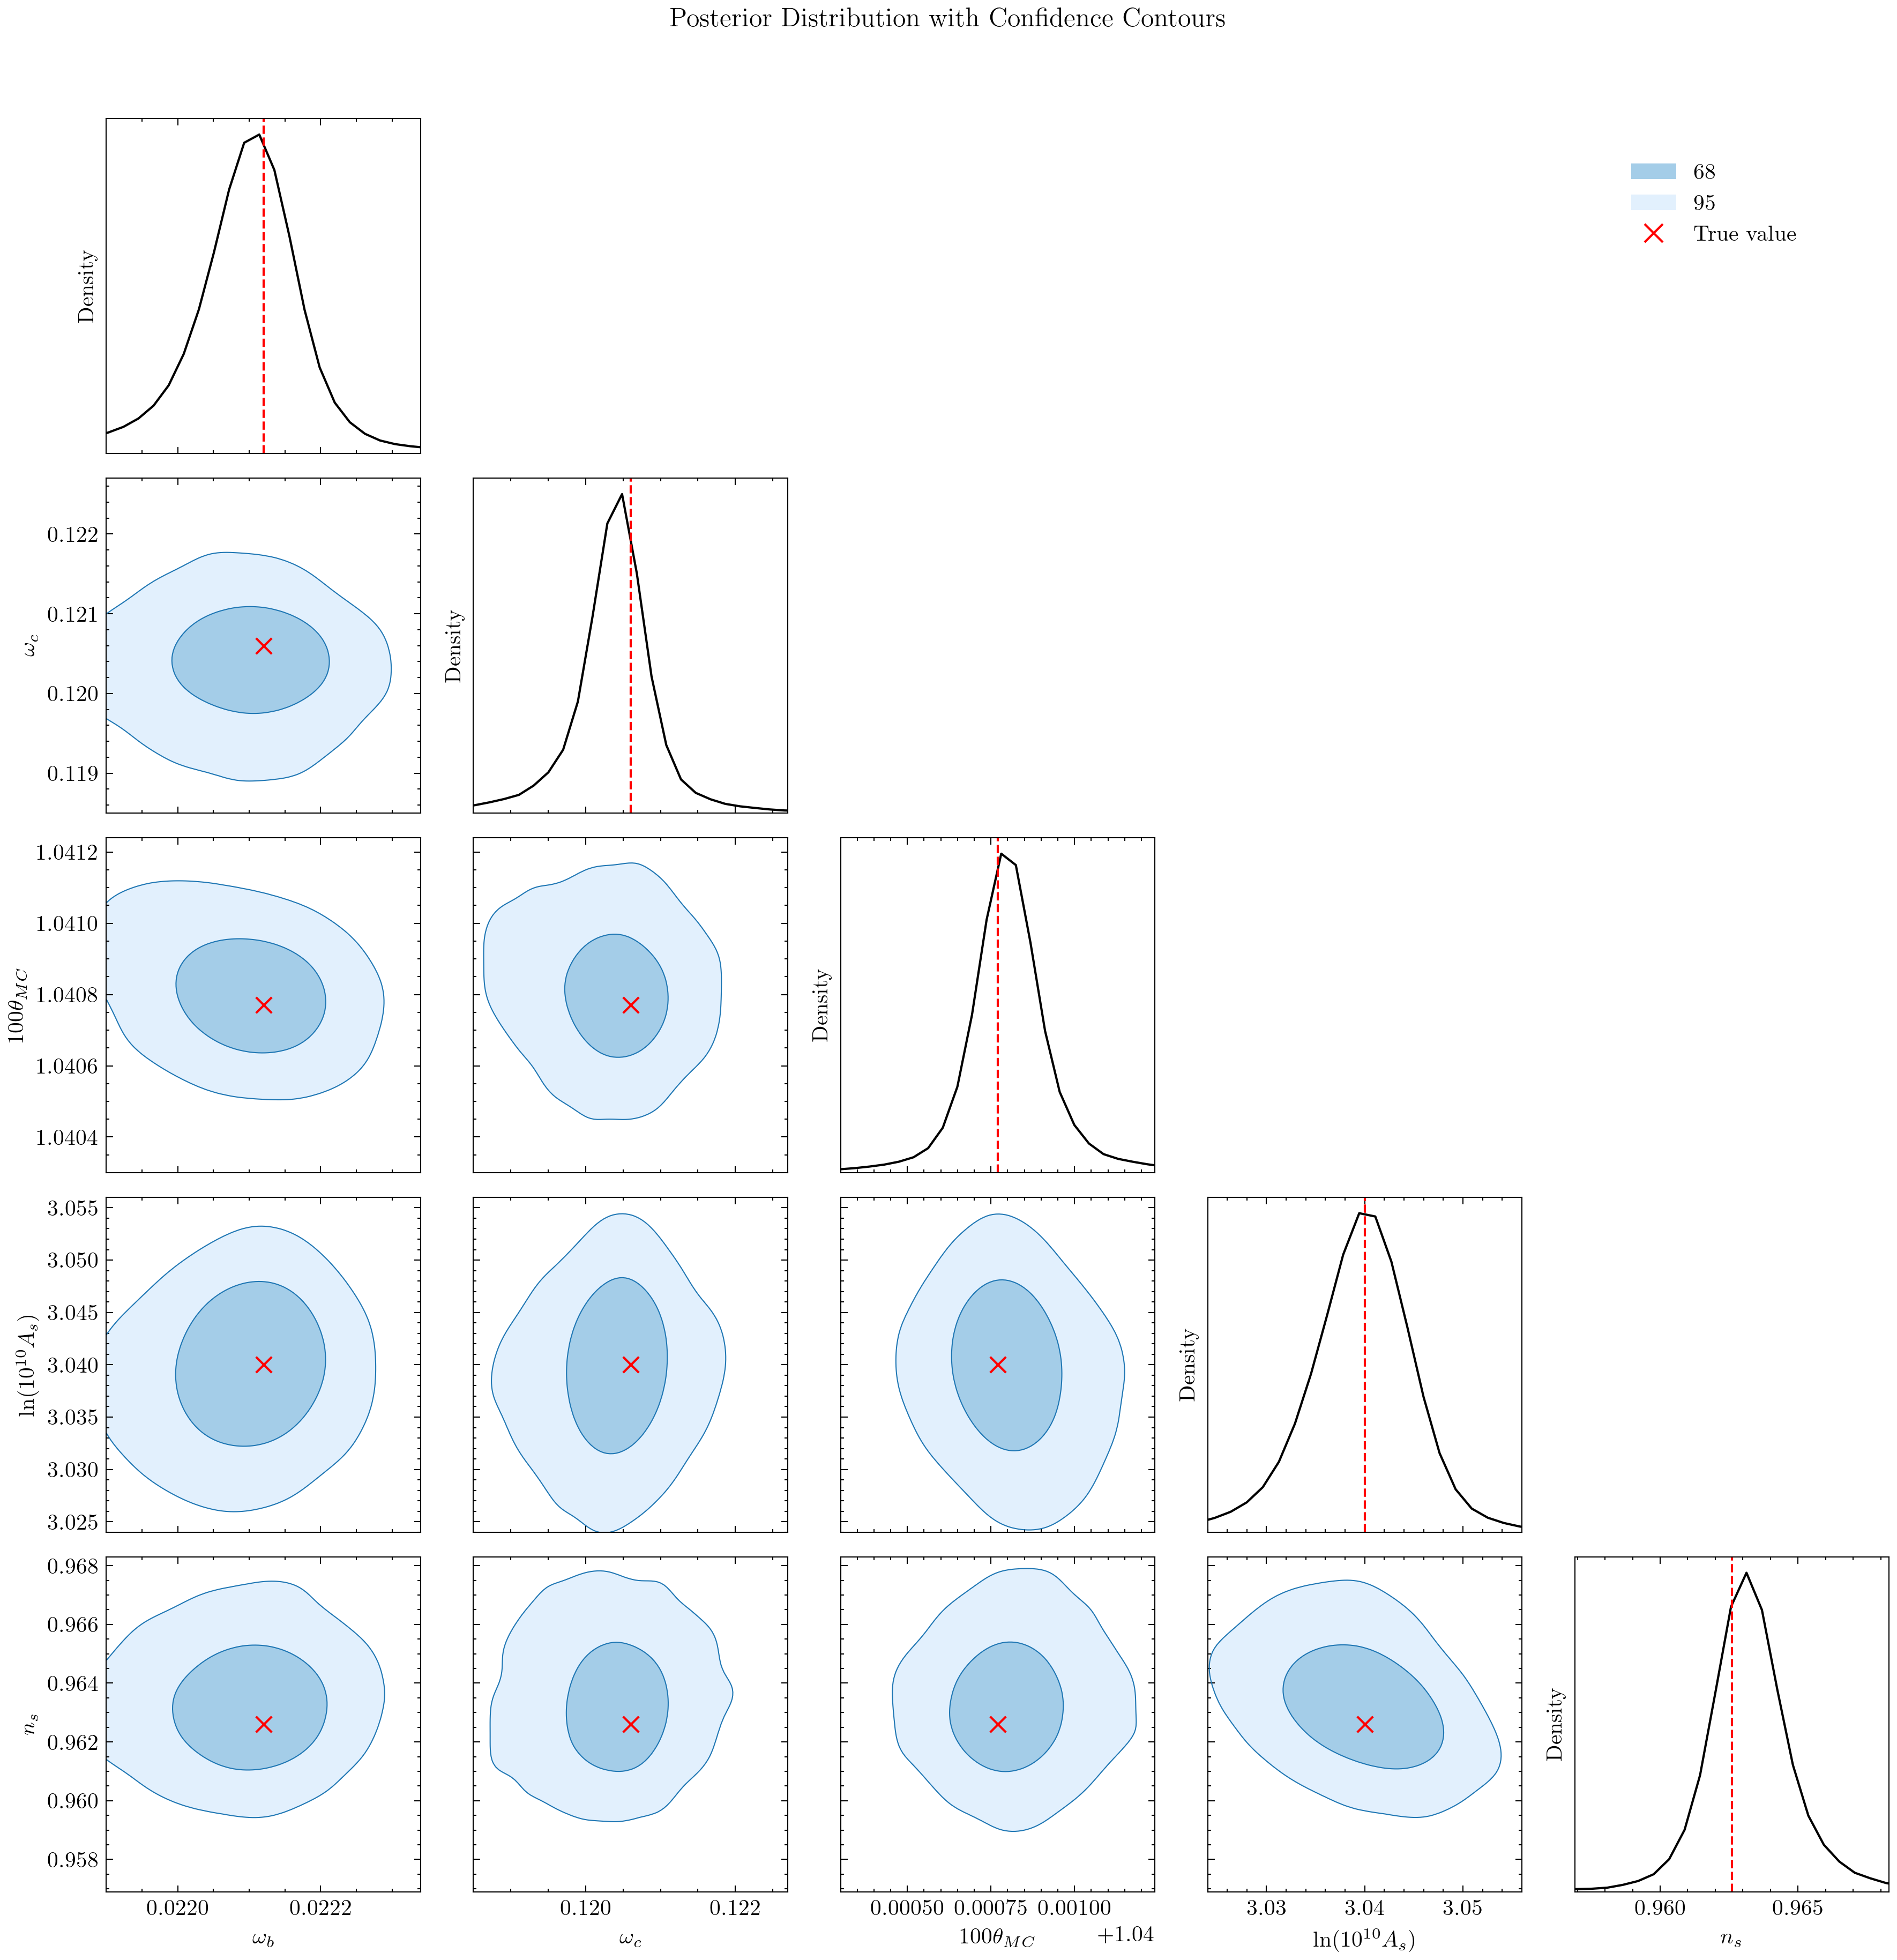

In [8]:
from src.plots.confidence_contours import plot_confidence_contours

fig, axes = plot_confidence_contours(samples, true_parameter, limits, param_names)
plt.show()

In [3]:
simulations = torch.load(os.path.join("..","data","simulations","simulations_10000.pt"), weights_only=True)
theta = simulations["theta"]
x = simulations["x"]

print(theta.shape)
print(x.shape)

torch.Size([10000, 5])
torch.Size([10000, 2551])


In [4]:
from sbi.inference import NPSE 

inference = NPSE(prior=prior)
inference.append_simulations(theta, x)
density_estimator = inference.train(max_num_epochs=0)
density_estimator.load_state_dict(torch.load(os.path.join("..", "results", "inference", "NPSE_10000.pth")))

 Training neural network. Epochs trained: 1

C:\Users\Julian\AppData\Local\Temp\ipykernel_18496\1002141437.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  density_estimator.load_state_dict(torch.load(os.path.join("

<All keys matched successfully>

In [5]:
true_parameter = torch.tensor([0.02212, 0.1206, 1.04077, 3.04, 0.9626])
x_observed = simulator(true_parameter)

posterior = inference.build_posterior(density_estimator).set_default_x(x_observed)
samples = posterior.sample((24000,))

Drawing 6409 posterior samples: 100%|██████████| 499/499 [00:09<00:00, 52.12it/s]1it/s]
Drawing 24000 posterior samples: 26115it [00:40, 641.52it/s]                           


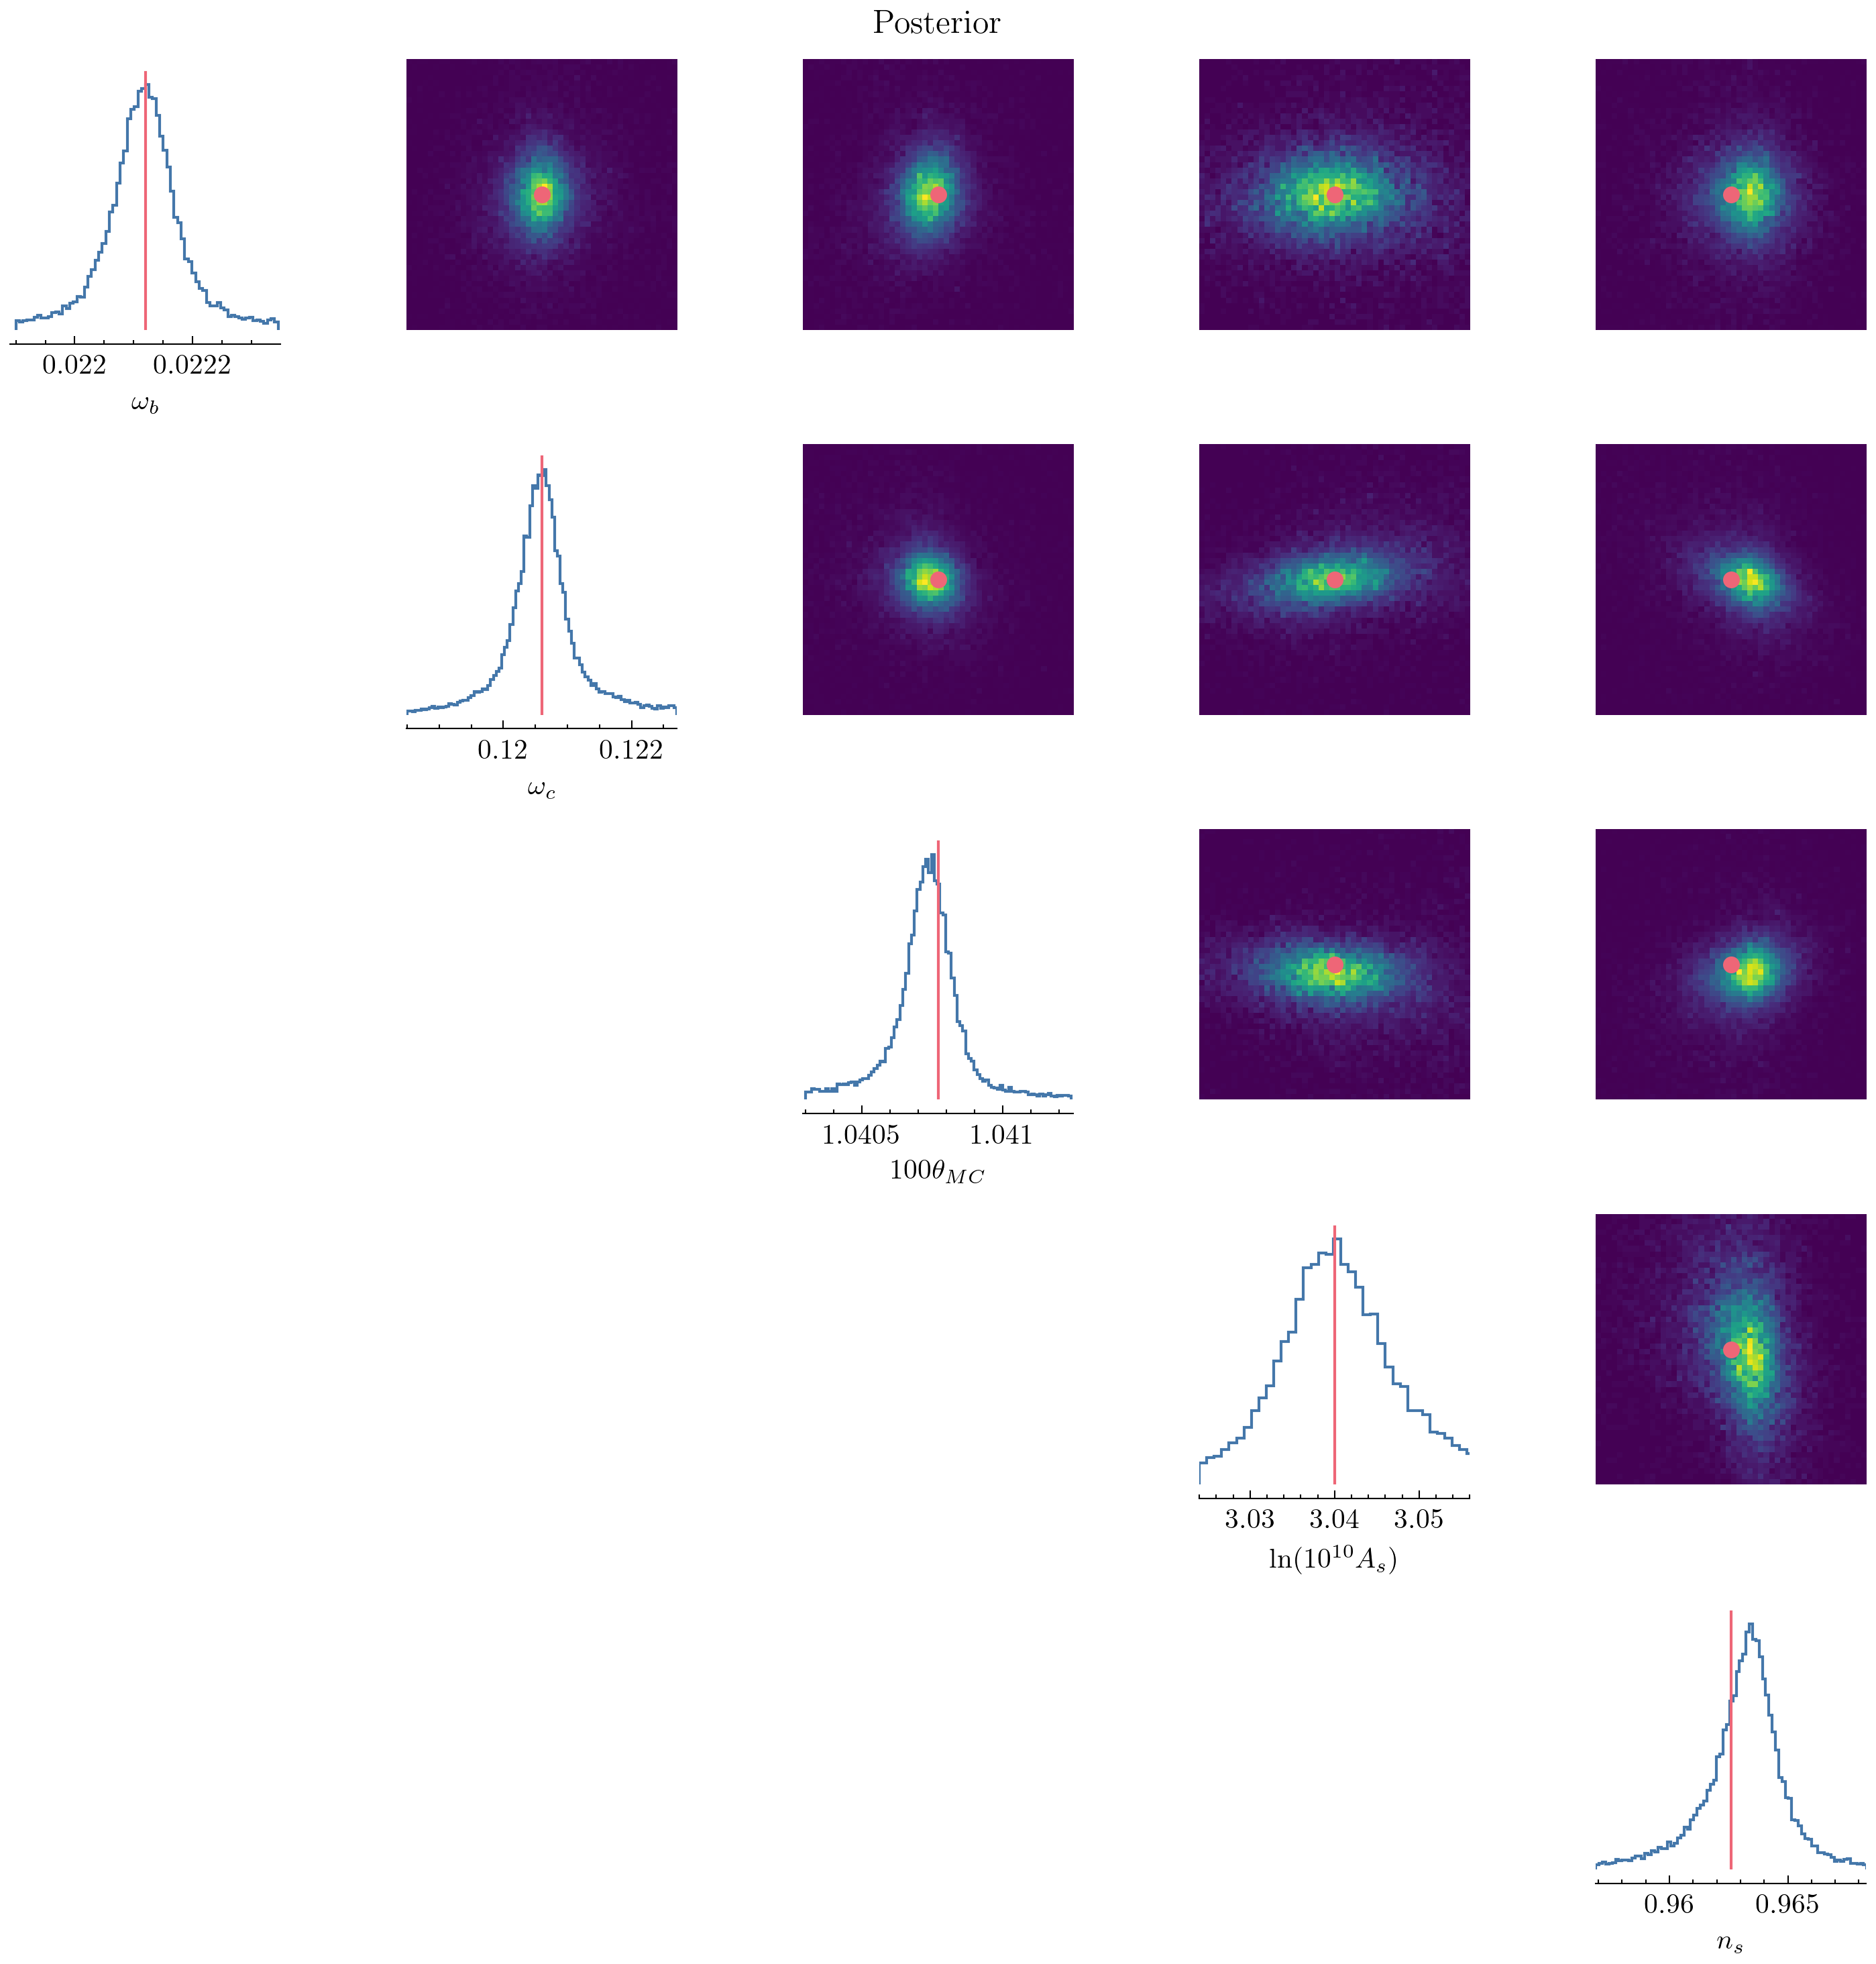

In [6]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.02212-0.00022, 0.02212+0.00022],    
    [0.1206-0.0021, 0.1206+0.0021],  
    [1.04077-0.00047, 1.04077+0.00047],      
    [3.04-0.016, 3.04+0.016],    
    [0.9626-0.0057, 0.9626+0.0057],  
])

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()

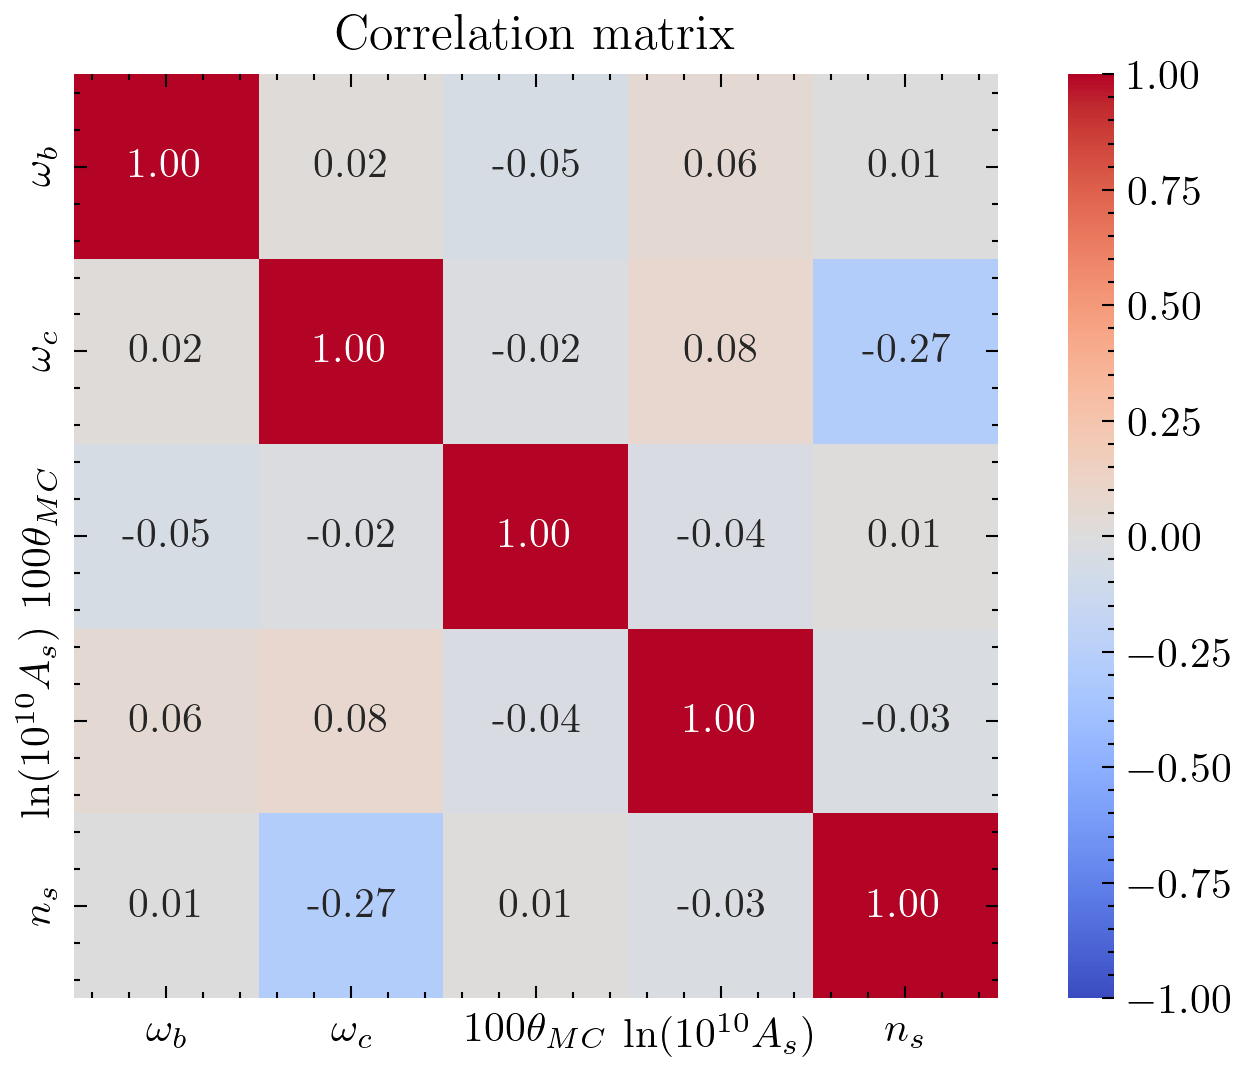

In [7]:
samples_np = samples.numpy()  
correlation_matrix = np.corrcoef(samples_np.T)  

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, xticklabels=param_names, yticklabels=param_names, vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

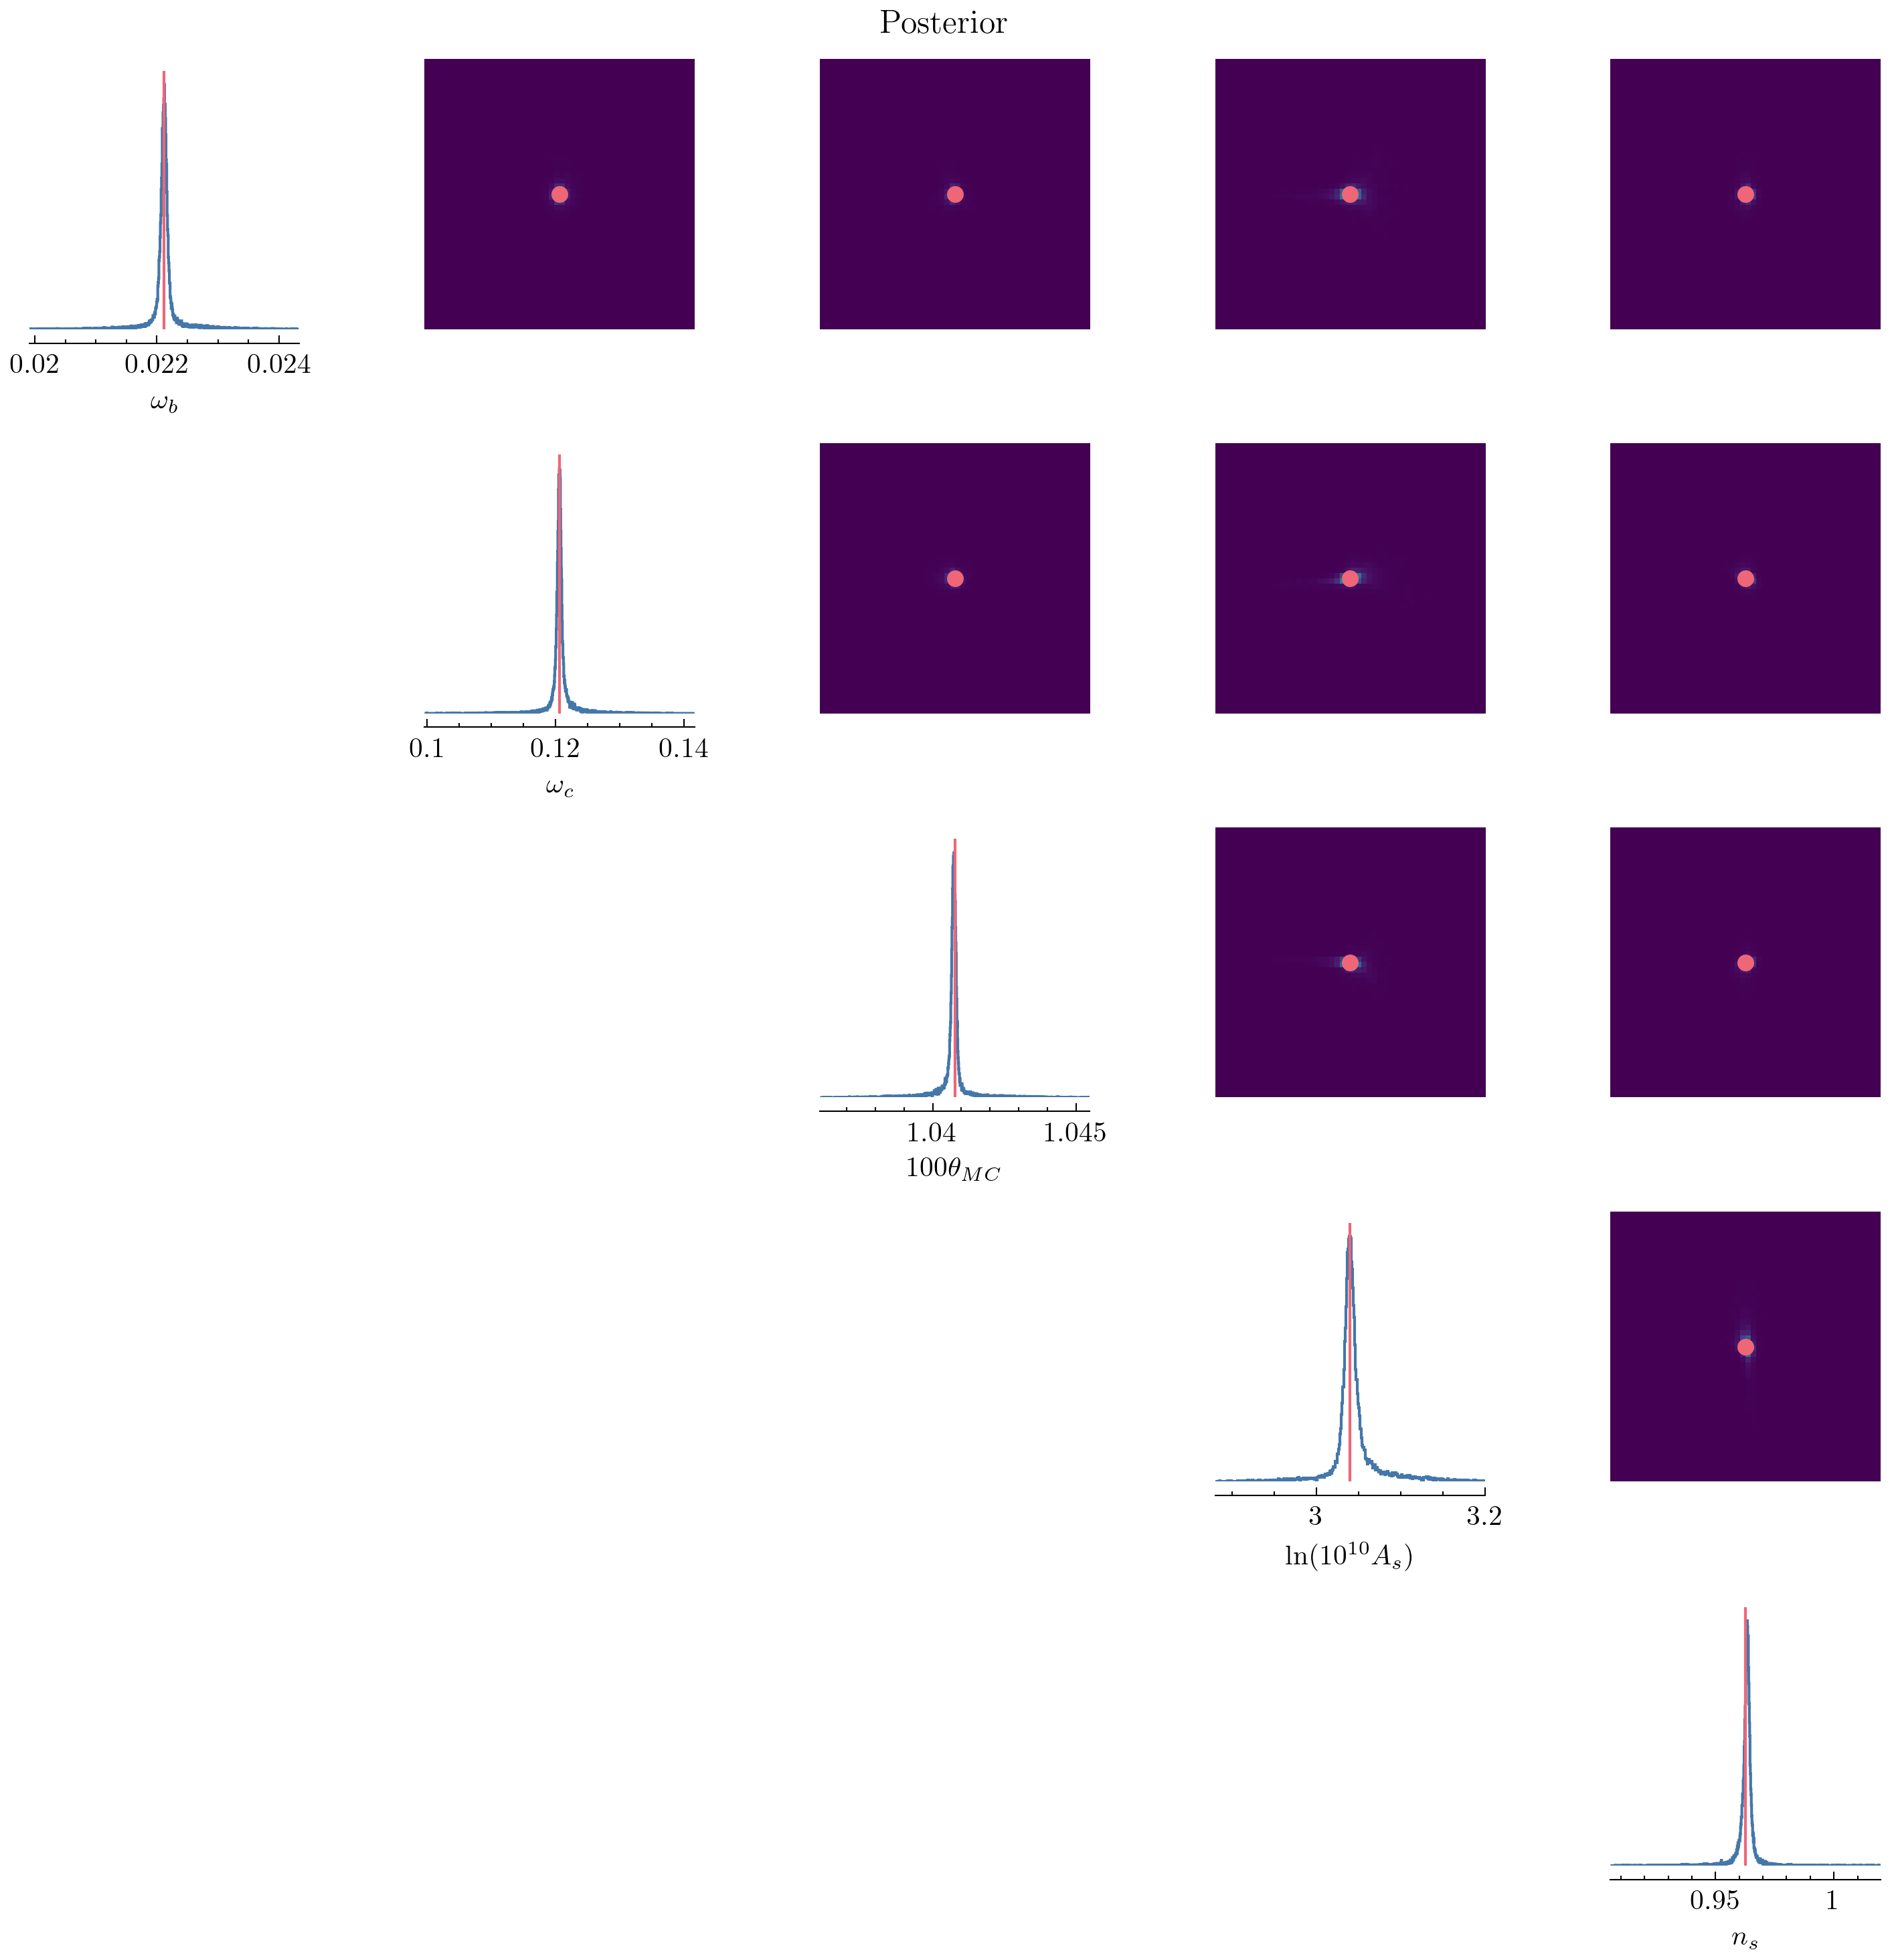

In [8]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.02212-0.0022, 0.02212+0.0022],    
    [0.1206-0.021, 0.1206+0.021],  
    [1.04077-0.0047, 1.04077+0.0047],      
    [3.04-0.16, 3.04+0.16],    
    [0.9626-0.057, 0.9626+0.057],  
])

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()

In [5]:
simulations = torch.load(os.path.join("..","data","simulations","simulations_25000.pt"), weights_only=True)
theta = simulations["theta"]
x = simulations["x"]

print(theta.shape)
print(x.shape)

torch.Size([25000, 5])
torch.Size([25000, 2551])


In [6]:
from sbi.inference import NPSE 

inference = NPSE(prior=prior)
inference.append_simulations(theta, x)
density_estimator = inference.train(max_num_epochs=0)
density_estimator.load_state_dict(torch.load(os.path.join("..", "results", "inference", "NPSE_25000.pth")))

 Training neural network. Epochs trained: 1

C:\Users\Julian\AppData\Local\Temp\ipykernel_18904\699941462.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  density_estimator.load_state_dict(torch.load(os.path.join(".

<All keys matched successfully>

In [7]:
true_parameter = torch.tensor([0.02212, 0.1206, 1.04077, 3.04, 0.9626])
x_observed = simulator(true_parameter)

posterior = inference.build_posterior(density_estimator).set_default_x(x_observed)
samples = posterior.sample((24000,))

Drawing 6173 posterior samples: 100%|██████████| 499/499 [00:09<00:00, 53.07it/s]8it/s]
Drawing 24000 posterior samples: 26049it [00:40, 640.66it/s]                           


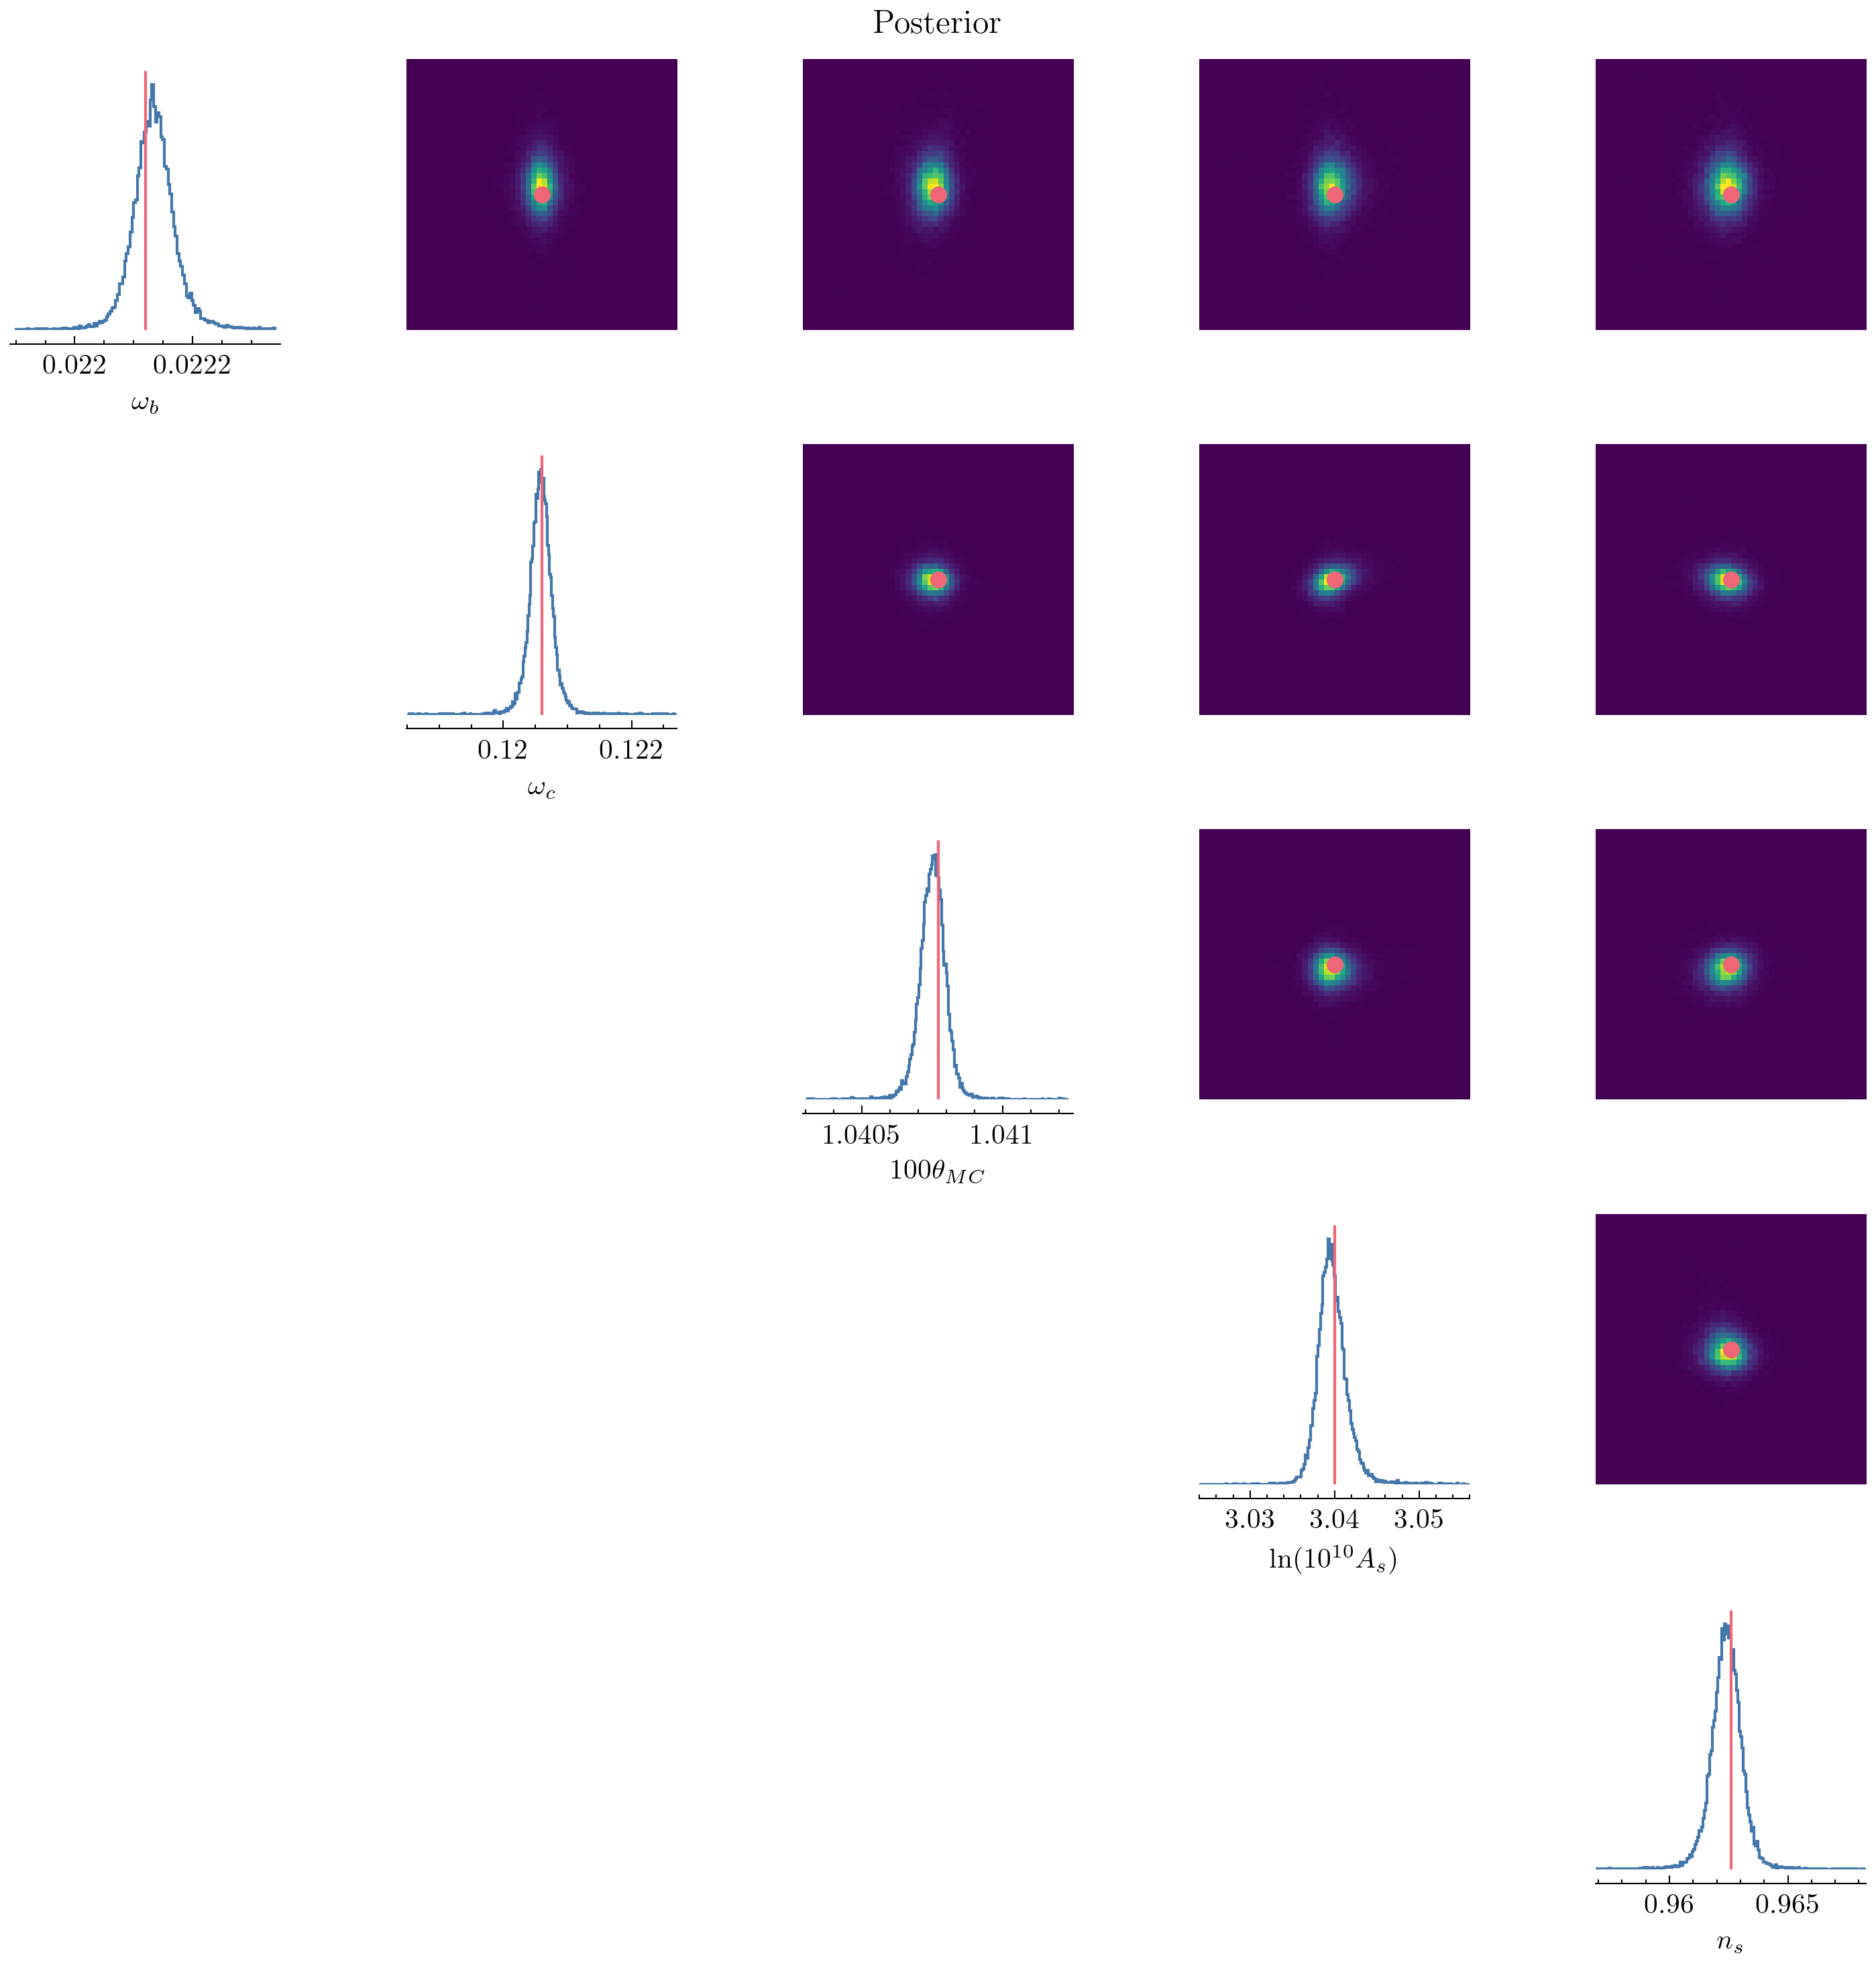

In [8]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.02212-0.00022, 0.02212+0.00022],    
    [0.1206-0.0021, 0.1206+0.0021],  
    [1.04077-0.00047, 1.04077+0.00047],      
    [3.04-0.016, 3.04+0.016],    
    [0.9626-0.0057, 0.9626+0.0057],  
])

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()

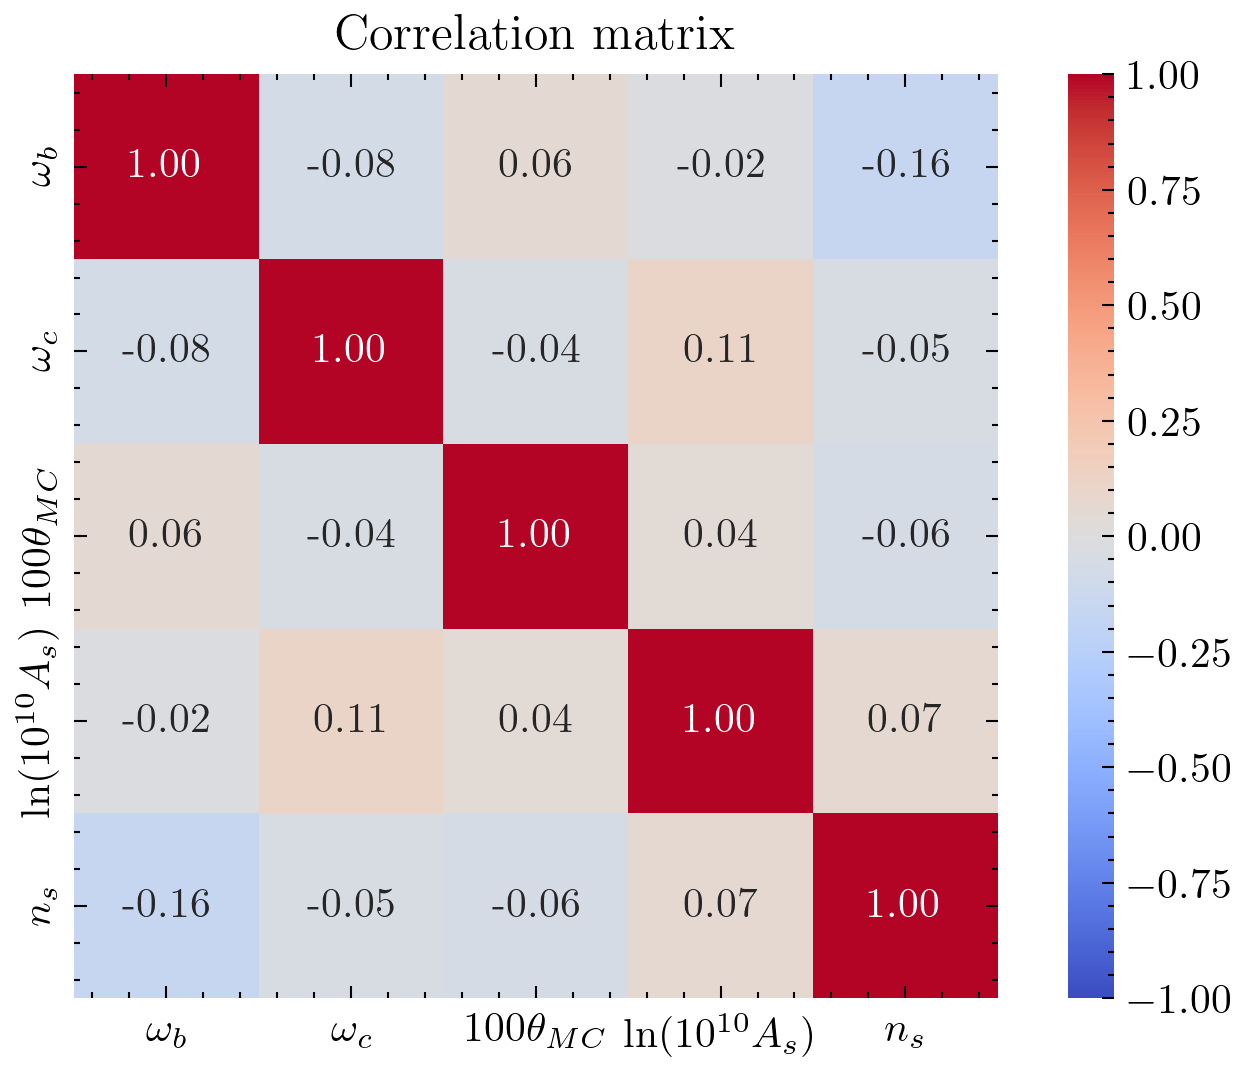

In [9]:
samples_np = samples.numpy()  
correlation_matrix = np.corrcoef(samples_np.T)  

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, xticklabels=param_names, yticklabels=param_names, vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

In [3]:
simulations = torch.load(os.path.join("..","data","simulations","simulations_25000.pt"), weights_only=True)
theta = simulations["theta"]
x = simulations["x"]

print(theta.shape)
print(x.shape)

torch.Size([25000, 5])
torch.Size([25000, 2551])


In [4]:
from sbi.inference import NPSE 

inference = NPSE(prior=prior)
inference.append_simulations(theta, x)
density_estimator = inference.train(max_num_epochs=0)
density_estimator.load_state_dict(torch.load(os.path.join("..", "results", "inference", "NPSE_25000.pth")))

 Training neural network. Epochs trained: 1

C:\Users\Julian\AppData\Local\Temp\ipykernel_15592\699941462.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  density_estimator.load_state_dict(torch.load(os.path.join(".

<All keys matched successfully>

In [5]:
true_parameter = torch.tensor([0.02212, 0.1206, 1.04077, 3.04, 0.9626])
x_observed = simulator(true_parameter)

posterior = inference.build_posterior(density_estimator).set_default_x(x_observed)
samples = posterior.sample((24000,))

Drawing 6151 posterior samples: 100%|██████████| 499/499 [00:09<00:00, 51.27it/s]7it/s]
Drawing 24000 posterior samples: 26035it [00:41, 626.30it/s]                           


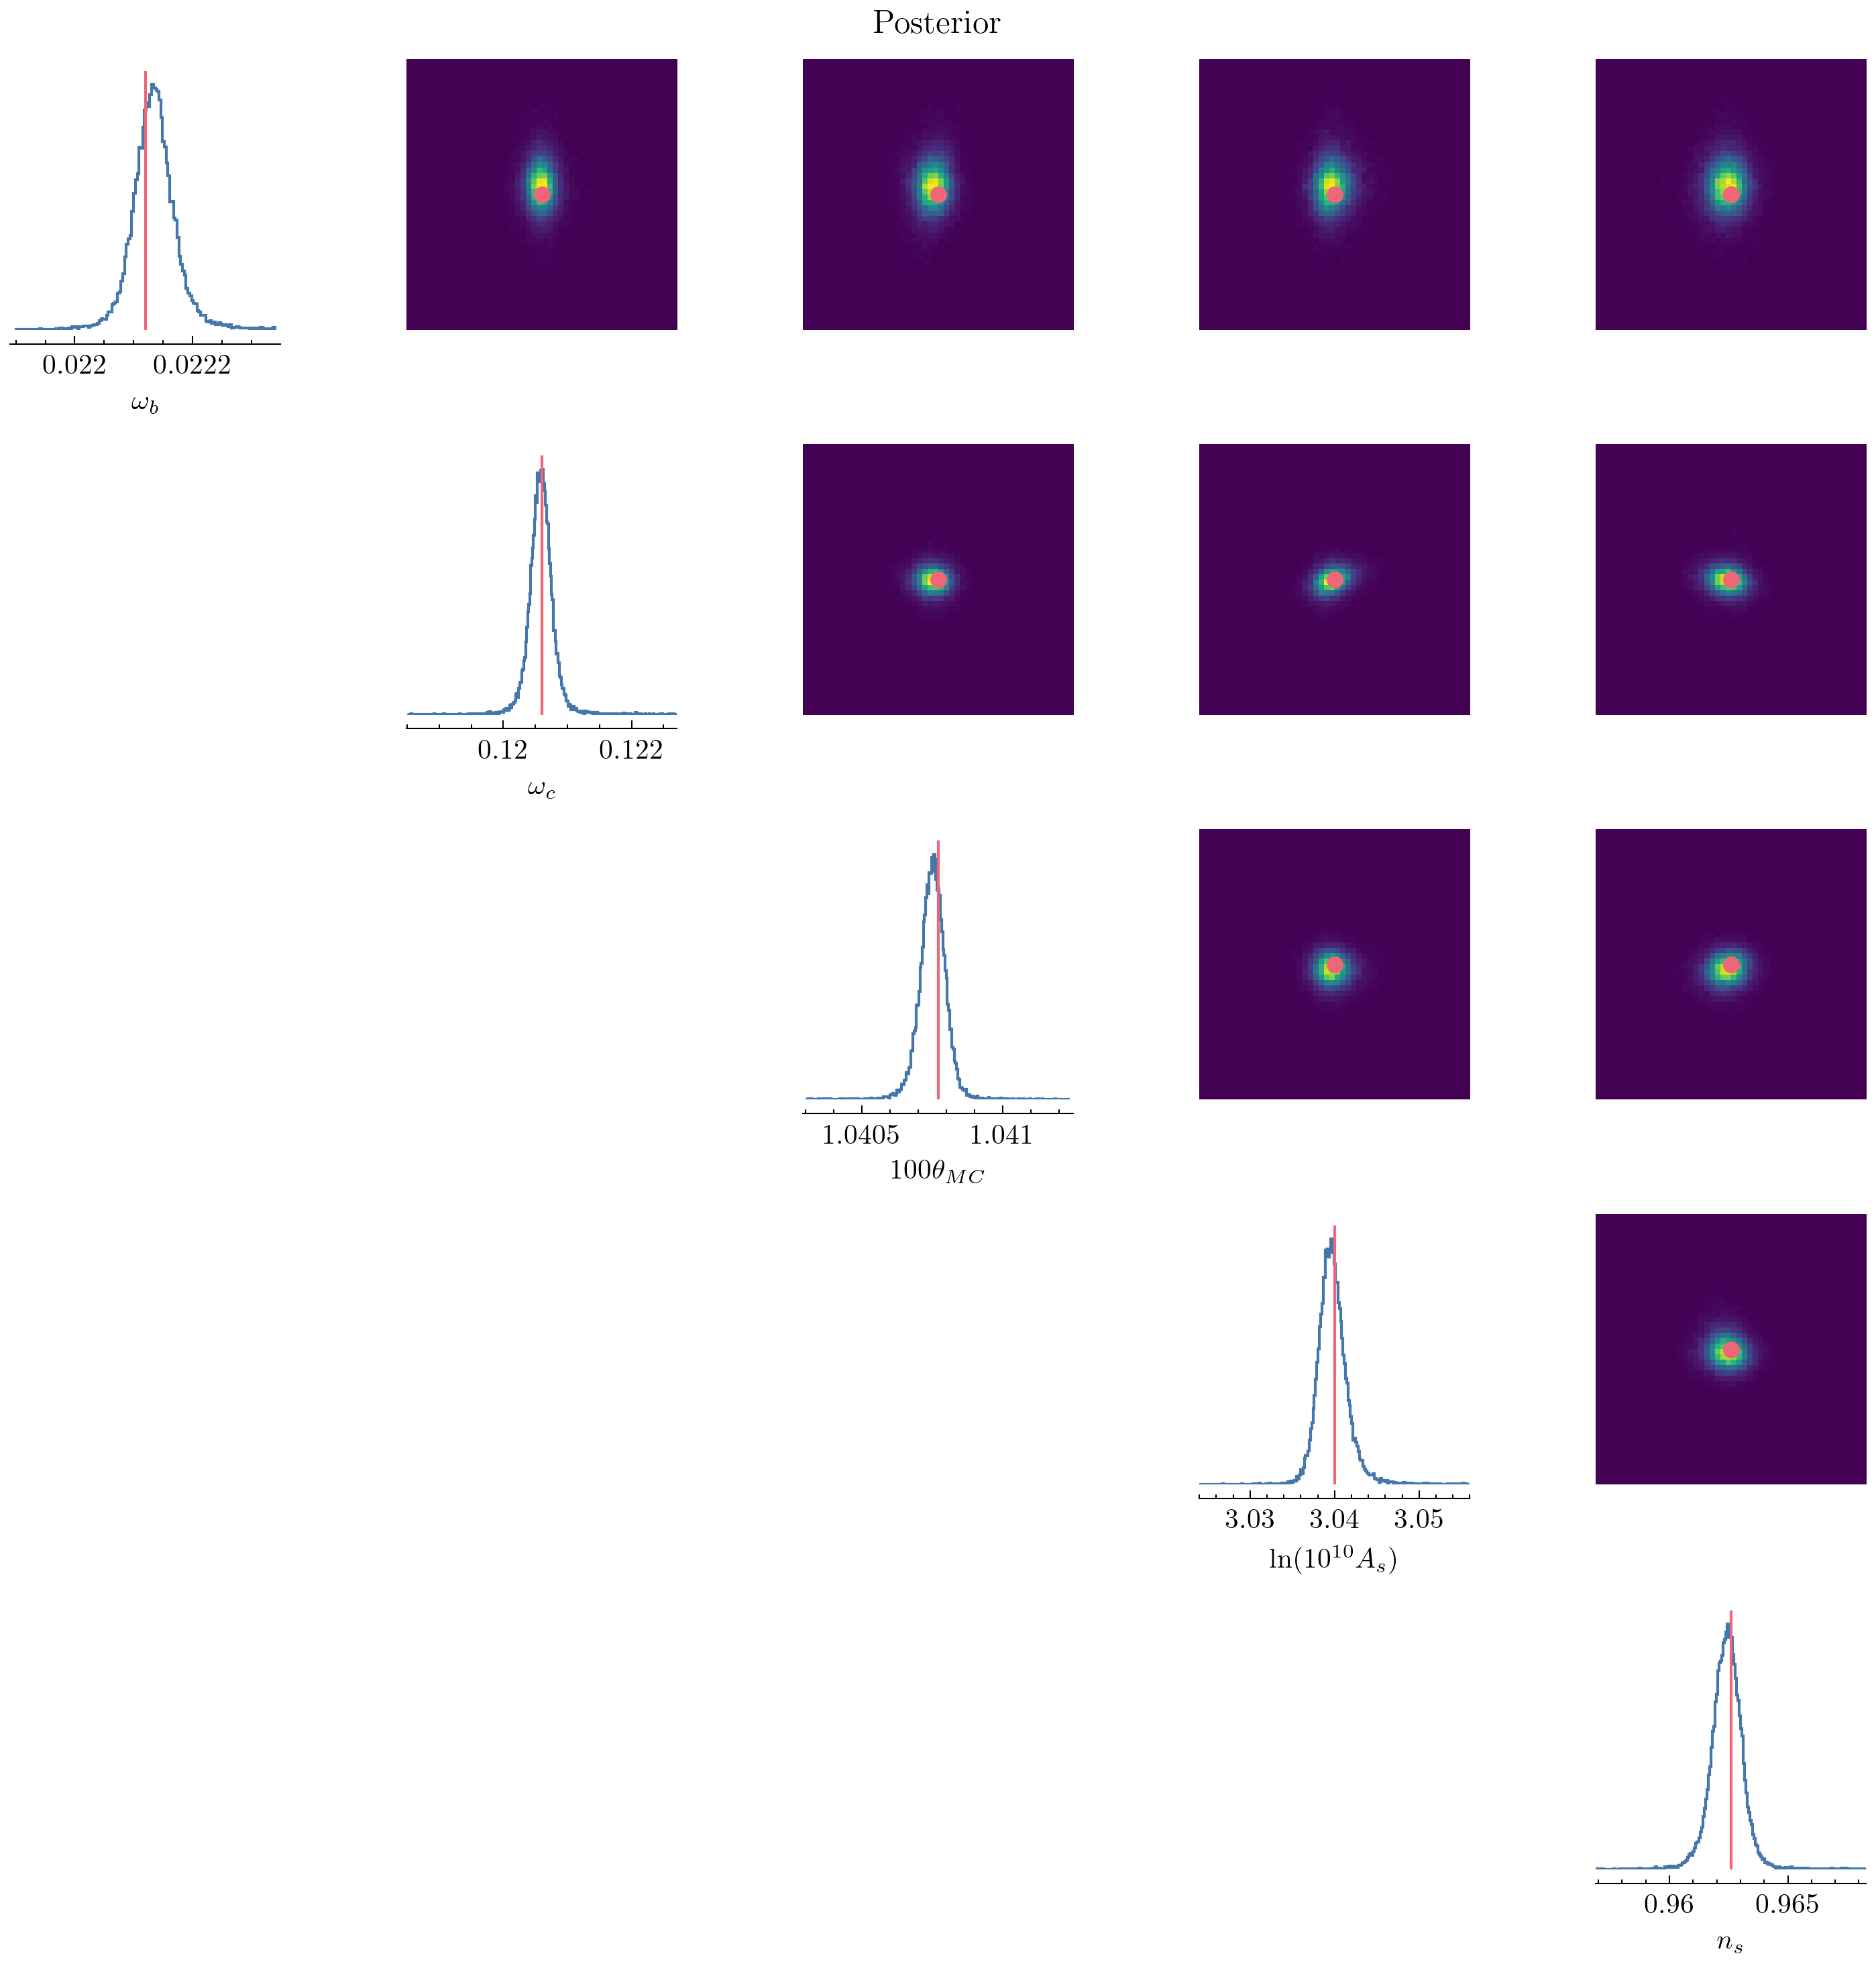

In [6]:
from sbi.analysis import pairplot

# --- LÍMITES DEL PRIOR ---
limits = torch.tensor([
    [0.02212-0.00022, 0.02212+0.00022],    
    [0.1206-0.0021, 0.1206+0.0021],  
    [1.04077-0.00047, 1.04077+0.00047],      
    [3.04-0.016, 3.04+0.016],    
    [0.9626-0.0057, 0.9626+0.0057],  
])

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

fig = pairplot(
    samples,
    points=true_parameter,
    figsize=(10, 10),
    limits=limits,
    labels=param_names
)

plt.suptitle('Posterior')
plt.tight_layout()
plt.show()